In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


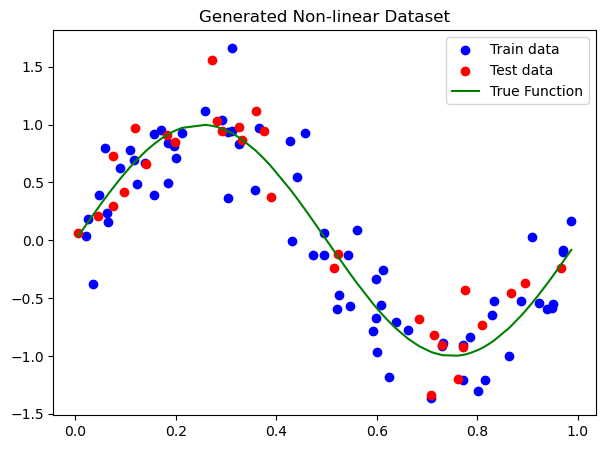

In [2]:
np.random.seed(42)

# True function: y = sin(2πx)
def true_function(x):
    return np.sin(2 * np.pi * x)

# Generate data
X = np.sort(np.random.rand(100))
y = true_function(X) + np.random.normal(0, 0.3, size=X.shape)

# Reshape for sklearn
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot the data
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X, true_function(X), color='green', label='True Function')
plt.title("Generated Non-linear Dataset")
plt.legend()
plt.show()


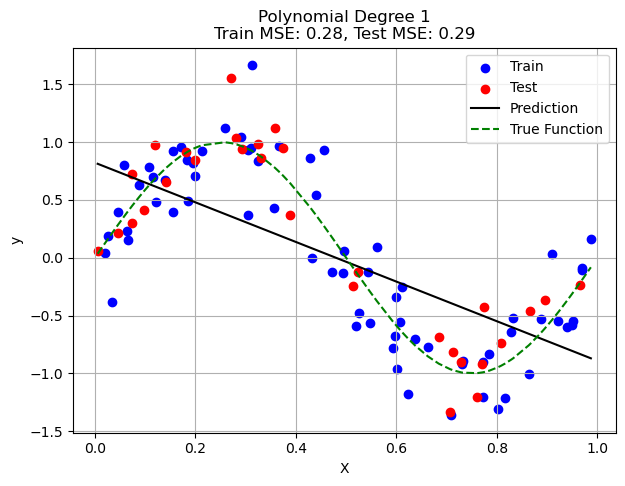

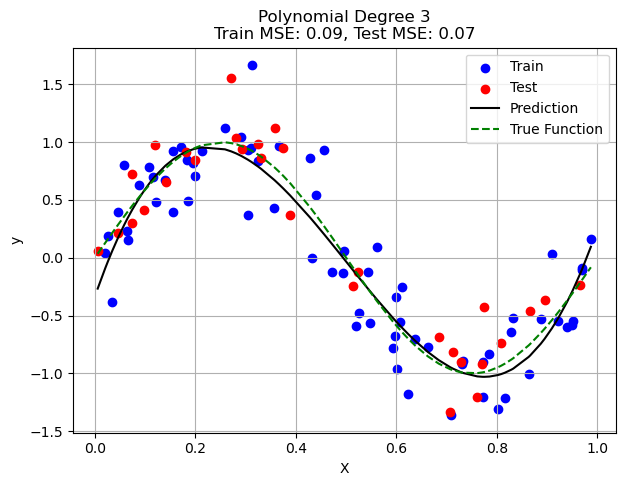

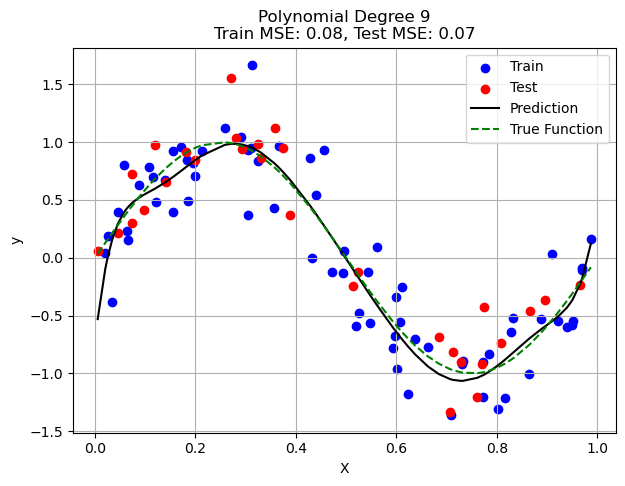

In [4]:
degrees = [1, 3, 9]

for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    # Plotting
    plt.figure(figsize=(7, 5))
    plt.scatter(X_train, y_train, color='blue', label='Train')
    plt.scatter(X_test, y_test, color='red', label='Test')
    plt.plot(X, model.predict(X), color='black', label='Prediction')
    plt.plot(X, true_function(X), color='green', label='True Function', linestyle='--')
    plt.title(f'Polynomial Degree {d}\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()


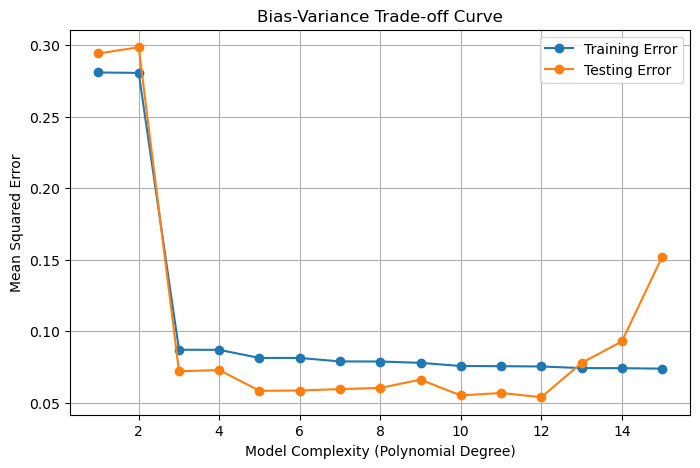

In [5]:
train_errors = []
test_errors = []
degrees = range(1, 16)

for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', marker='o')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Trade-off Curve")
plt.legend()
plt.grid(True)
plt.show()
